In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import os
import sys
from copy import copy, deepcopy

In [2]:
sys.path.append("/root/project/soter_v2")
sys.path.append("/root/project/soter_v2/metric_space_analysis")
sys.path.append("/root/project/soter_v2/loop_topology")

In [3]:
from metric_space_analysis.search import *
from loop_topology.loop_topo import *

In [4]:
# import data
data = pickle.load(open("report/arch_Simba/obj_edp/bertlarge_input1/layer-4/record.pkl", "rb"))

In [5]:
# make fundametals
map_records = data["map_record"]
buffers = [
  ("DRAM", 0),
  ("GlobalBuffer", 1),
  ("InputBuffer", 2),
  ("WeightBuffer", 3),
  ("AccumulationBuffer", 4),
  ("Registers", 5),
]

In [6]:
#insert loop topology column
new_map_records = deepcopy(map_records)
new_map_records["topo"] = []
for map_data in new_map_records["map"]:
  topo = LoopTopo(buffers).parse_map(map_data)
  new_map_records["topo"].append(topo)

In [7]:
#	epoch	map	batch_idx	cycle	energy	edp	topo
df = pd.DataFrame(new_map_records)

In [8]:
#cycle	energy	edp
#min	max	mean	min	max	mean	min	max	mean
#epoch	
stat_epoch_df = df.groupby('epoch').agg({
    'cycle': ['min', 'max', 'mean'],
    'energy': ['min', 'max', 'mean'],
    'edp': ['min', 'max', 'mean']
})

In [15]:
# group by topo
## num of search
## min, mean, max, std
df_by_topo = df.groupby('topo').agg(
  count=('topo', 'count'),
  cycle=('cycle', 'mean'),
  energy=('energy', 'mean'),
  edp=('edp', 'mean')
)

In [17]:
df_by_topo

,count,cycle,energy,edp
topo,,,,
"{'Registers': {'temporal': ['N'], 'spatial': []}, 'AccumulationBuffer': {'temporal': ['C', 'K'], 'spatial': ['C', 'K', 'N']}, 'WeightBuffer': {'temporal': ['C', 'K'], 'spatial': []}, 'InputBuffer': {'temporal': [], 'spatial': []}, 'GlobalBuffer': {'temporal': ['C', 'K'], 'spatial': ['C']}, 'DRAM': {'temporal': ['N', 'K'], 'spatial': []}}",32,-214810624.0,-15390.412500,3.779833e+12
"{'Registers': {'temporal': ['N'], 'spatial': []}, 'AccumulationBuffer': {'temporal': ['C', 'K'], 'spatial': ['C', 'K']}, 'WeightBuffer': {'temporal': ['C', 'K'], 'spatial': []}, 'InputBuffer': {'temporal': ['K'], 'spatial': []}, 'GlobalBuffer': {'temporal': ['C'], 'spatial': []}, 'DRAM': {'temporal': ['C', 'K', 'N'], 'spatial': []}}",32,-274194432.0,-16892.041562,4.820059e+12
"{'Registers': {'temporal': ['N'], 'spatial': []}, 'AccumulationBuffer': {'temporal': ['C', 'K'], 'spatial': ['C']}, 'WeightBuffer': {'temporal': ['K', 'C'], 'spatial': []}, 'InputBuffer': {'temporal': ['K'], 'spatial': []}, 'GlobalBuffer': {'temporal': ['C'], 'spatial': []}, 'DRAM': {'temporal': ['N', 'K'], 'spatial': []}}",32,-189454336.0,-12122.205625,2.729265e+12
"{'Registers': {'temporal': ['N'], 'spatial': []}, 'AccumulationBuffer': {'temporal': ['C', 'N', 'K'], 'spatial': ['C', 'K']}, 'WeightBuffer': {'temporal': ['K'], 'spatial': []}, 'InputBuffer': {'temporal': ['C'], 'spatial': []}, 'GlobalBuffer': {'temporal': [], 'spatial': ['K', 'C']}, 'DRAM': {'temporal': ['K', 'N'], 'spatial': []}}",32,-245014528.0,-12712.778750,3.753357e+12
"{'Registers': {'temporal': ['N'], 'spatial': []}, 'AccumulationBuffer': {'temporal': ['C', 'N', 'K'], 'spatial': ['C', 'N', 'K']}, 'WeightBuffer': {'temporal': ['N'], 'spatial': []}, 'InputBuffer': {'temporal': ['N', 'K'], 'spatial': []}, 'GlobalBuffer': {'temporal': ['K'], 'spatial': ['C', 'K']}, 'DRAM': {'temporal': ['K', 'N', 'C'], 'spatial': []}}",32,-189759488.0,-12947.396563,2.443512e+12
"{'Registers': {'temporal': ['N'], 'spatial': []}, 'AccumulationBuffer': {'temporal': ['C'], 'spatial': ['C', 'K', 'N']}, 'WeightBuffer': {'temporal': ['N', 'K'], 'spatial': []}, 'InputBuffer': {'temporal': [], 'spatial': []}, 'GlobalBuffer': {'temporal': [], 'spatial': ['C', 'K']}, 'DRAM': {'temporal': ['C', 'N', 'K'], 'spatial': []}}",32,-258981888.0,-14762.472187,5.279059e+12
"{'Registers': {'temporal': ['N'], 'spatial': []}, 'AccumulationBuffer': {'temporal': ['C'], 'spatial': ['C', 'K']}, 'WeightBuffer': {'temporal': [], 'spatial': []}, 'InputBuffer': {'temporal': ['C', 'K'], 'spatial': []}, 'GlobalBuffer': {'temporal': [], 'spatial': ['K', 'C']}, 'DRAM': {'temporal': ['K', 'C'], 'spatial': []}}",32,-215162880.0,-13629.860313,3.366922e+12
"{'Registers': {'temporal': ['N'], 'spatial': []}, 'AccumulationBuffer': {'temporal': ['C'], 'spatial': ['K', 'C']}, 'WeightBuffer': {'temporal': ['K'], 'spatial': []}, 'InputBuffer': {'temporal': [], 'spatial': []}, 'GlobalBuffer': {'temporal': [], 'spatial': ['C']}, 'DRAM': {'temporal': ['C', 'K'], 'spatial': []}}",32,-178421760.0,-13392.617813,2.734388e+12
"{'Registers': {'temporal': ['N'], 'spatial': []}, 'AccumulationBuffer': {'temporal': ['C'], 'spatial': ['K', 'C']}, 'WeightBuffer': {'temporal': [], 'spatial': []}, 'InputBuffer': {'temporal': ['K'], 'spatial': []}, 'GlobalBuffer': {'temporal': ['C'], 'spatial': ['K', 'C']}, 'DRAM': {'temporal': ['K', 'C', 'N'], 'spatial': []}}",32,-201867264.0,-14435.265625,3.657741e+12


In [10]:
error code

SyntaxError: invalid syntax (2860216362.py, line 1)

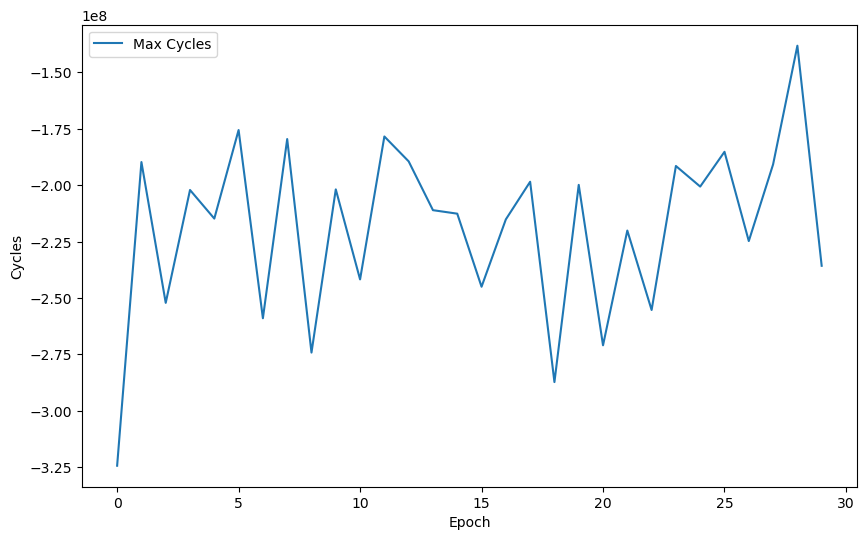

In [ ]:
plt.figure(figsize=(10, 6))
# plt.plot(stat_epoch_df.index, stat_epoch_df[('cycle', 'min')], label='Min Cycles')
plt.plot(stat_epoch_df.index, stat_epoch_df[('cycle', 'mean')], label='Max Cycles')
plt.xlabel('Epoch')
plt.ylabel('Cycles')
plt.legend()
plt.show()

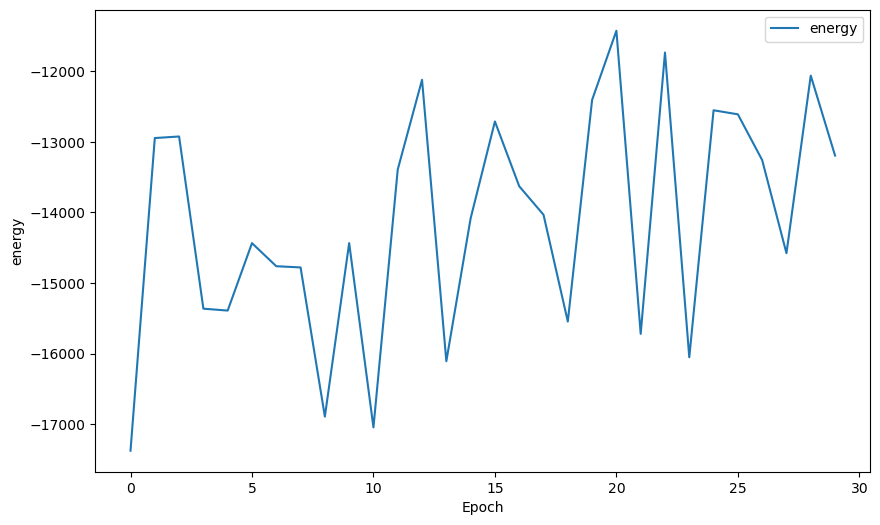

In [ ]:
plt.figure(figsize=(10, 6))
# plt.plot(stat_epoch_df.index, stat_epoch_df[('cycle', 'min')], label='Min Cycles')
plt.plot(stat_epoch_df.index, stat_epoch_df[('energy', 'mean')], label='energy')
plt.xlabel('Epoch')
plt.ylabel('energy')
plt.legend()
plt.show()

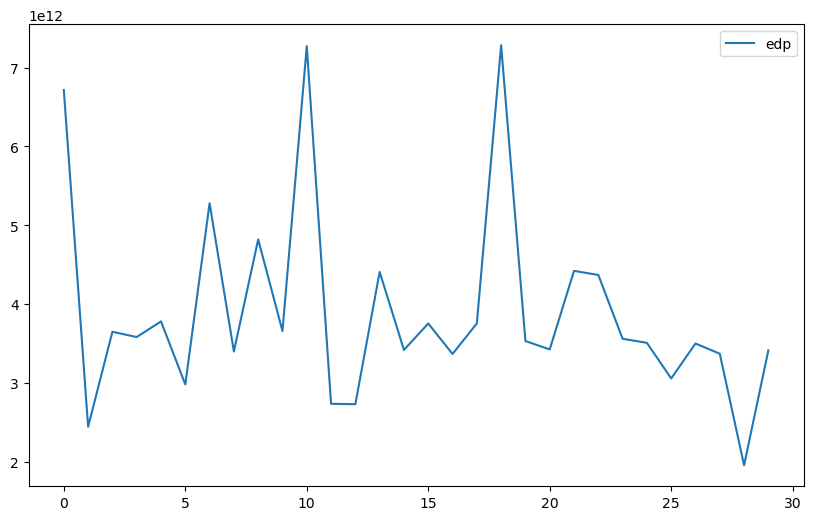

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(stat_epoch_df.index, stat_epoch_df[('edp', 'mean')], label='edp')
plt.legend()
plt.show()

In [ ]:
map_records["map"][0]

{'mapping': [{'target': 'Registers',
   'type': 'temporal',
   'factors': 'R=1 S=1 P=1 Q=1 C=1 K=1 H=1 N=256',
   'permutation': 'PRCNQSKH'},
  {'target': 'Registers',
   'type': 'datatype',
   'keep': ['Weights'],
   'bypass': ['Inputs', 'Outputs']},
  {'target': 'AccumulationBuffer',
   'type': 'temporal',
   'factors': 'R=1 S=1 P=1 Q=1 C=32 K=1 H=1 N=1',
   'permutation': 'SHCRKPQN'},
  {'target': 'AccumulationBuffer',
   'type': 'spatial',
   'factors': 'R=1 S=1 P=1 Q=1 C=1 K=8 H=1 N=1',
   'permutation': 'SHCRKPQN'},
  {'target': 'AccumulationBuffer',
   'type': 'datatype',
   'keep': ['Outputs'],
   'bypass': ['Weights', 'Inputs']},
  {'target': 'WeightBuffer',
   'type': 'temporal',
   'factors': 'R=1 S=1 P=1 Q=1 C=1 K=2 H=1 N=1',
   'permutation': 'HCNRSPKQ'},
  {'target': 'WeightBuffer',
   'type': 'datatype',
   'keep': ['Weights'],
   'bypass': ['Inputs', 'Outputs']},
  {'target': 'InputBuffer',
   'type': 'temporal',
   'factors': 'R=1 S=1 P=1 Q=1 C=1 K=2 H=1 N=1',
   'perm

In [ ]:
min_cycle_map = df.loc[df['cycle'].idxmax()]
min_enery_map = df.loc[df['energy'].idxmax()]
min_edp_map = df.loc[df['edp'].idxmin()]

In [ ]:
yaml.dump(min_cycle_map["map"], open("min_cycle_map.yaml", "w"))
yaml.dump(min_enery_map["map"], open("min_energy_map.yaml", "w"))
yaml.dump(min_edp_map["map"], open("min_edp_map.yaml", "w"))

In [ ]:
min_cycle_map

epoch                                                       20
map          {'mapping': [{'target': 'Registers', 'type': '...
batch_idx                                                   21
cycle                                              -14680064.0
energy                                                -4994.29
edp                                         73316496834.559998
topo         {'Registers': {'temporal': ['N'], 'spatial': [...
Name: 661, dtype: object

In [ ]:
min_enery_map

epoch                                                       20
map          {'mapping': [{'target': 'Registers', 'type': '...
batch_idx                                                   21
cycle                                              -14680064.0
energy                                                -4994.29
edp                                         73316496834.559998
topo         {'Registers': {'temporal': ['N'], 'spatial': [...
Name: 661, dtype: object

In [ ]:
min_edp_map

epoch                                                       20
map          {'mapping': [{'target': 'Registers', 'type': '...
batch_idx                                                   21
cycle                                              -14680064.0
energy                                                -4994.29
edp                                         73316496834.559998
topo         {'Registers': {'temporal': ['N'], 'spatial': [...
Name: 661, dtype: object